# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [3]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [4]:
# Sua análise da parte 1 começa aqui.

### Análise Questão 1

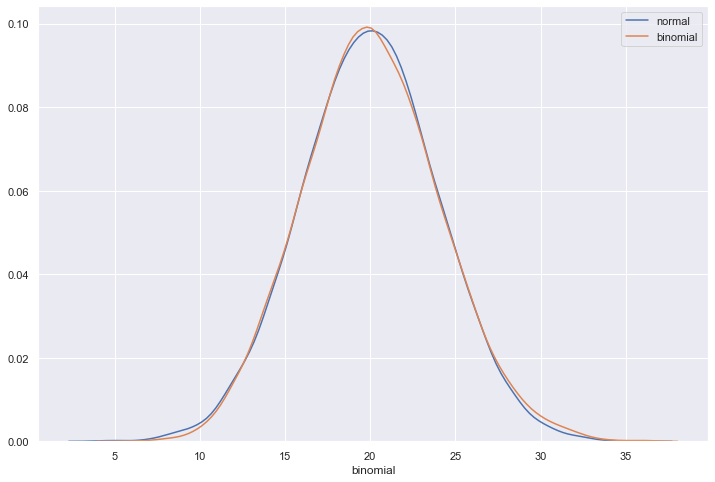

In [5]:
sns.distplot(dataframe['normal'], hist = False, label = "normal");
sns.distplot(dataframe['binomial'], hist = False, label = "binomial");

### Análise Questão 2

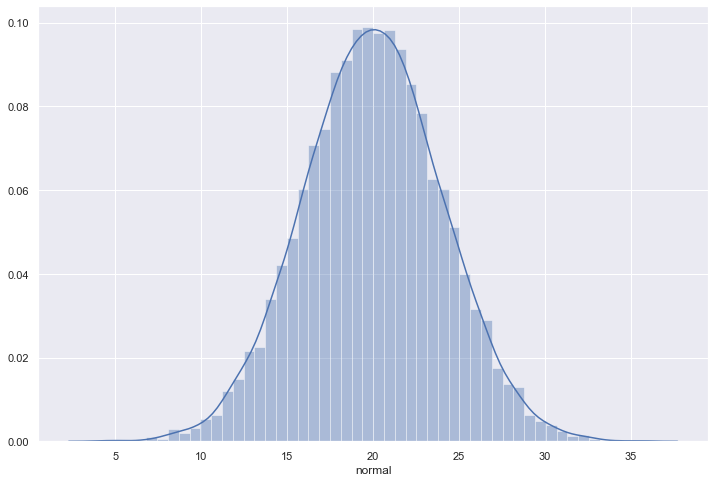

In [6]:
sns.distplot(dataframe['normal']);

In [7]:
#Função de distribuição acumulada empírica (CDF empírica) da variável normal
ecdf = ECDF(dataframe['normal'])
    
#Média
media = dataframe['normal'].mean()
    
#Desvio Padrão
std = dataframe['normal'].std()
    
#Probabilidade no intervalo [𝑥¯−𝑠,𝑥¯+𝑠]
resposta1 = np.around((ecdf((media + std)) - ecdf((media - std))), 4)

#Probabilidade no intervalo [𝑥¯−2𝑠,𝑥¯+2𝑠]
resposta2 = np.around((ecdf((media + (2 * std))) - ecdf((media - (2 * std)))), 4)

#Probabilidade no intervalo [𝑥¯−3𝑠,𝑥¯+3𝑠]
resposta3 = np.around((ecdf((media + (3 * std))) - ecdf((media - (3 * std)))), 4)

(resposta1, resposta2, resposta3)

(0.6838, 0.9538, 0.9973)

### Análise Questão 3

In [8]:
#Média e variância da variável binomial
binomial = np.array([dataframe['binomial'].mean(), dataframe['binomial'].var()])
    
#Média e variância da variável normal
normal = np.array([dataframe['normal'].mean(), dataframe['normal'].var()])
    
#Diferença entre as médias e as variâncias das variáveis binomial e normal
tuple(np.around((binomial - normal), 3))

(0.106, 0.22)

In [9]:
np.random.seed(42)

#Aumentando o tamanho
binomial_cem_mil = sct.binom.rvs(100, 0.2, size=100000)

#Média e variância da variável binomial
binomial = np.array([binomial_cem_mil.mean(), binomial_cem_mil.var()])
    
#Média e variância da variável normal
normal = np.array([dataframe['normal'].mean(), dataframe['normal'].var()])
    
#Diferença entre as médias e as variâncias das variáveis binomial e normal
tuple(np.around((binomial - normal), 3))

(-0.003, -0.196)

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [10]:
def q1():
    #Quantis da variável normal
    normal = np.percentile(dataframe['normal'], [25, 50, 75])
    
    #Quantis da variável binomial
    binomial = np.percentile(dataframe['binomial'], [25, 50, 75])
    
    #Diferença entre os quartis (Q1, Q2 e Q3) das variáveis normal e binomial
    return tuple(np.around((normal - binomial), 3))

    pass

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [11]:
def q2():
    #Função de distribuição acumulada empírica (CDF empírica) da variável normal
    ecdf = ECDF(dataframe['normal'])
    
    #Média
    media = dataframe['normal'].mean()
    
    #Desvio Padrão
    std = dataframe['normal'].std()
    
    #Probabilidade no intervalo [𝑥¯−𝑠,𝑥¯+𝑠]
    return float(np.around((ecdf((media + std)) - ecdf((media - std))), 3))

    pass

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

R: Os valores calculados se aproximam dos valores da regra empírica, onde: 68% dos dados estão dentro do primeiro desvio padrão, 95% nos dois primeiros desvios padrão e 99.7% nos três primeiros desvios padrão.

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [12]:
def q3():
    #Média e variância da variável binomial
    binomial = np.array([dataframe['binomial'].mean(), dataframe['binomial'].var()])
    
    #Média e variância da variável normal
    normal = np.array([dataframe['normal'].mean(), dataframe['normal'].var()])
    
    #Diferença entre as médias e as variâncias das variáveis binomial e normal
    return tuple(np.around((binomial - normal), 3))

    pass

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

R: Aumentando n na distribuição da variável "binomial" para 100000 percebe-se que essa distribuição aproxima-se mais da distribuição normal.

## Parte 2

### _Setup_ da parte 2

In [13]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [14]:
# Sua análise da parte 2 começa aqui.

### Análise Questão 4

In [15]:
filter_mean_profile = stars.mean_profile[stars['target'] == 0]
    
false_pulsar_mean_profile_standardized = ((filter_mean_profile - filter_mean_profile.mean()) / filter_mean_profile.std())
    
#Quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95
quantis_teoricos = sct.norm.ppf([0.80, 0.90, 0.95])
    
#Função de distribuição acumulada empírica (CDF empírica) da variável false_pulsar_mean_profile_standardized
ecdf = ECDF(false_pulsar_mean_profile_standardized)
    
#Probabilidades associadas aos quantis acima
tuple(np.around(ecdf(quantis_teoricos), 3))

(0.806, 0.911, 0.959)

In [16]:
#Média
media = false_pulsar_mean_profile_standardized.mean()
    
#Desvio Padrão
std = false_pulsar_mean_profile_standardized.std()

#Probabilidade no intervalo [𝑥¯−𝑠,𝑥¯+𝑠]
resposta1 = np.around((ecdf((media + std)) - ecdf((media - std))), 4)

#Probabilidade no intervalo [𝑥¯−2𝑠,𝑥¯+2𝑠]
resposta2 = np.around((ecdf((media + (2 * std))) - ecdf((media - (2 * std)))), 4)

#Probabilidade no intervalo [𝑥¯−3𝑠,𝑥¯+3𝑠]
resposta3 = np.around((ecdf((media + (3 * std))) - ecdf((media - (3 * std)))), 4)

(resposta1, resposta2, resposta3)

(0.6856, 0.9557, 0.9952)

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [17]:
def q4():
    #1
    filter_mean_profile = stars.mean_profile[stars['target'] == 0]
    
    #2
    false_pulsar_mean_profile_standardized = ((filter_mean_profile - filter_mean_profile.mean()) / filter_mean_profile.std())
    
    #Quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95
    quantis_teoricos = sct.norm.ppf([0.80, 0.90, 0.95])
    
    #Função de distribuição acumulada empírica (CDF empírica) da variável false_pulsar_mean_profile_standardized
    ecdf = ECDF(false_pulsar_mean_profile_standardized)
    
    #Probabilidades associadas aos quantis acima
    return tuple(np.around(ecdf(quantis_teoricos), 3))
    
    pass

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

Percebe-se que a distribuição segue a regra empírica, sendo próxima então à uma distribuição normal, por isso os valores calculados acima fazem sentido ser tão próximos dos valores originais.

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [18]:
def q5():
    # Retorne aqui o resultado da questão 5.
    
    #Filtro dos valores de mean_profile onde target == 0 (ou seja, onde a estrela não é um pulsar)
    filter_mean_profile = stars.mean_profile[stars['target'] == 0]
    
    
    #Padronizacao da variável mean_profile filtrada anteriormente para ter média 0 e variância 1
    false_pulsar_mean_profile_standardized = ((filter_mean_profile - filter_mean_profile.mean()) / filter_mean_profile.std())
    
    #Quantis Q1, Q2 e Q3 de false_pulsar_mean_profile_standardized
    quantis = np.percentile(false_pulsar_mean_profile_standardized, [25, 50, 75])
    
    #Quantis teóricos de uma distribuição normal de média 0 e variância 1
    quantis_teoricos = sct.norm.ppf([0.25, 0.50, 0.75])
    
    #Diferença entre os quartis (Q1, Q2 e Q3) de false_pulsar_mean_profile_standardized e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1
    return tuple(np.around((quantis - quantis_teoricos), 3))
    
    pass

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.